# Introduction to Neural Networks

We want to install the following packages this week:
  - Numpy
  - Matplotlib
  - Jupyter

The main goals of this session is to get our feet wet programming in Python and to understand some of the basics of machine learning by coding a perceptron.

## Neurons

As an abstraction, a neuron can be viewed as the most basic unit of computation, similar to a logic gate.
A logic gate is the most basic unit of digital computing: It receives some electrical input or inputs and provides some output, usually after some function (linear or non-linear.)

![alt text](AndGate.svg "And Gate")

A /real/ neuron consists of a dendrite, which collects and transforms inputs from other areas of the brain, a cell body that accumulates these inputs and an output that is transmisted through an axon.
Clearly they share a lot of similiarities with logic gates.
However, there are many details and vast differences when digging past this simple analogy.
As an example, there are 100s of different kinds of neurons, connected in many different ways depending on brain area and purpose, and the dynamics of neurons are also vastly complicated.

![alt text](neuron.jpg "Neuron")

The artificial neurons we'll be dealing with are much simpler than real neurons.
We just require that they take some inputs, changed a by connection weights, and compute some non-linear function based on that.

![alt text](artificialNeuron.jpg "Neuron")

We'll call this a neuron. or a unit.

## Perceptron

Let's just concentrate on a model with some set of input neurons and some set of output neurons.
The output neurons will take some value from the inputs, multiply that by the weights, and then pass that through a non-linear function.
We can choose the Heavyside function to be our non-linearity such that the perceptron will output one of two labels: 0 or 1.

This system turns out to be very robust and useful at solving a wide variety of classification problems.
However, it can only solve linearly separable problems.

![alt text](linearClassifier.png "Neuron")

### Considerations: Cost Function
In the 2D case, it is easy to plot the data and check that your choice of weights is actually separating the data.
However, when we jump to higher dimensions (sometimes millions of dimensions), this becomes impossible.
For that reason we turn to a cost function: a way of evaluating how well our solution is performing.
In the case of the perceptron we want for one set of data to lie above the plane (the positive side, or the side labeled as 1) and the other set to lie below the plane (the negative side or the side labeled as 0.)

Therefore one of the possible cost functions we could use is:

$C(y, \hat y) = (y -  \hat y)$

Where:
  - $y$: is the class of the input (ie 0 or 1)
  - $\hat y$: is the model's predicted class given the input (again 0 or 1)

Another popular cost function is:

$C(y, \hat y) = \frac{1}{2}(y -  \hat y)^2$

There are many others and it is one of the key choices in the algorithm design. We will be using the first one for the perceptron.


### Considerations: Training Algorithm
For real problems it is untractable to manipulate the weights individually and manually. This where the _machine_ part of machine learning comes in. We want an algorithm that can manipulate the weights towards a solution that minimizes the cost function (ie it brings the model closer to a good solution.) For the perceptron we have a pretty simple way of updating the weights.

$\vec w_{i+1} = \vec w_i + (\hat y - y)\cdot\vec x$

What this equation does is to update to the weights based on the cost and the input that made that cost. If $\hat y = y$ then the difference will be zero and the weights will remain the same, however if the they are not equal then there will be some update to the weights. If the difference is positive ($(\hat y - y) > 0$) then we'll move the weight vector closer to $\vec x$. If the difference is negative ($(\hat y - y) > 0$) then we'll move the weight vector to be anti-parallel (pointing in exactly the opposite direction) of $\vec x$.

# Exercises

In this notebook you'll find a series of classification problems. You need to build a perceptron with two inputs, one output and a bias. Then for each the problems try to find what set of weights will allow you to solve the problem.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def perceptron(X, w):
    return np.dot(w[:-1], X) + w[-1] >= 0

    """
    Here is where your code should go.
    Remember the bias term.
    """

In [20]:
np.dot(np.array([1,1,2]), np.array([-8,1,2]))

-3

## Problem 1: Vertical Separation

In [21]:
def problem1(perceptron=None, weights=None, training=None):
    pop1 = np.random.normal([-3, 0], [ 0.7, 0.7], size=[100,2])
    pop2 = np.random.normal([ 3, 0], [ 0.7, 0.7], size=[100,2])
    plt.scatter(pop1[:,0], pop1[:,1], color='blue')
    plt.scatter(pop2[:,0], pop2[:,1], color='green')
    if not(perceptron is None):
        if weights is None and training is None:
            print('One of weights or training must be set if a perceptron is passed')
        elif not(weights is None):
            pass
        elif not(training is None):
            dataset = np.concatenate([pop1,pop2], axis=0)
            labels = np.concatenate([np.zeros(100),np.ones(100)]).reshape(200,1)
            weights = training(dataset, labels, perceptron)
            print('Your training algorithm got the following weights: {}'.format(weights))
        
        size = 500
        X,Y = np.meshgrid(np.linspace(-10,10,size),np.linspace(-10,10,size))
        x = np.stack([X,Y], axis=-1)
        Z = np.zeros([size, size])
        for i in range(size):
            for j in range(size):
                Z[i,j] = perceptron(x[i,j,:], weights)
        plt.contour(X,Y,Z, [0])
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])

C:\Users\sholo\Miniconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


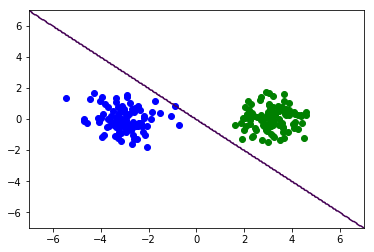

In [25]:
problem1(perceptron, weights = np.array([1,1,0]), training=trainPerceptron)

## Problem 2: Horizontal Separation

In [37]:
def problem2(perceptron=None, weights=None, training=None):
    pop1 = np.random.normal([-1.5, 1.5], [ 0.7, 1.7], size=[100,2])
    pop2 = np.random.normal([ 0, -5], [ 0.4, 0.7], size=[100,2])
    plt.scatter(pop1[:,0], pop1[:,1], color='blue')
    plt.scatter(pop2[:,0], pop2[:,1], color='green')
    if not(perceptron is None):
        if weights is None and training is None:
            print('One of weights or training must be set if a perceptron is passed')
        elif not(weights is None):
            pass
        elif not(training is None):
            dataset = np.concatenate([pop1,pop2], axis=0)
            labels = np.concatenate([np.zeros(100),np.ones(100)]).reshape(200,1)
            weights = training(dataset, labels, perceptron)
            print('Your training algorithm got the following weights: {}'.format(weights))

        size = 500
        X,Y = np.meshgrid(np.linspace(-10,10,size),np.linspace(-10,10,size))
        x = np.stack([X,Y], axis=-1)
        Z = np.zeros([size, size])
        for i in range(size):
            for j in range(size):
                Z[i,j] = perceptron(x[i,j,:], weights)
        plt.contour(X,Y,Z, [0])
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])

Your training algorithm got the following weights: [ 5.62344866 -2.64426251 -3.80616336]


C:\Users\sholo\Miniconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


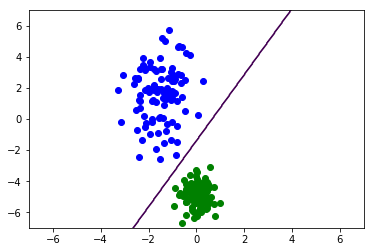

In [83]:
problem2(perceptron, training=trainPerceptron)

## Problem 3: Diagonal Separation

In [26]:
def problem3(perceptron=None, weights=None, training=None):
    pop1 = np.zeros([200,2])
    for i,j in enumerate(((0,0), (1.5,1.5), (-1.5,-1.5), (-3,-3.5))):
        pop1[50*i:50*(i+1),:] = np.random.normal(j, [ 0.7, 0.7], size=[50,2])
    pop2 = np.random.normal([ 1, -5], [ 0.6, 0.7], size=[100,2])
    plt.scatter(pop1[:,0], pop1[:,1], color='blue')
    plt.scatter(pop2[:,0], pop2[:,1], color='green')
    if not(perceptron is None):
        if weights is None and training is None:
            print('One of weights or training must be set if a perceptron is passed')
        elif not(weights is None):
            pass
        elif not(training is None):
            dataset = np.concatenate([pop1,pop2], axis=0)
            labels = np.concatenate([np.zeros(200),np.ones(100)]).reshape(300,1)
            weights = training(dataset, labels, perceptron)
            print('Your training algorithm got the following weights: {}'.format(weights))
        
        size=500
        X,Y = np.meshgrid(np.linspace(-10,10,size),np.linspace(-10,10,size))
        x = np.stack([X,Y], axis=-1)
        Z = np.zeros([size,size])
        for i in range(size):
            for j in range(size):
                Z[i,j] = perceptron(x[i,j,:], weights)
        plt.contour(X,Y,Z, [0])
    plt.xlim([-7, 7])
    plt.ylim([-7, 5])

Your training algorithm got the following weights: [ 1.97696252 -2.15002824 -5.62255879]


C:\Users\sholo\Miniconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


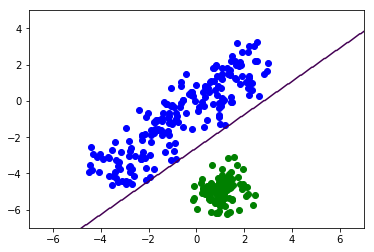

In [66]:
problem3(perceptron, training=trainPerceptron)

## Problem 4: Training

Implement the training algorithm so that your perceptron can learn on its own. Then go back and verify that it is working by redoing the first three problems.

In [16]:
def trainPerceptron(dataset, labels, perceptron):
    """
    dataset: a numpy array with shape (number of inputs, dimension of inputs)
    labels: a numpy array with shape (number of inputs, 1); the labels are either 0 or 1
    perceptron: your perceptron function; it must consume the input vector, and a vector of weights
    
    The function returns a numpy array with the weights. The last weight is the bias.
    """         
    
    weights = np.random.normal(0,1,size=[2+1])
    for _ in range(300):
        for i in range(dataset.shape[0]):
            prediction = perceptron(dataset[i,:], weights)
            error = labels[i,0] - prediction
            if error:
                weights[:-1] = weights[:-1] + error*dataset[i,:]
                weights[-1] = weights[-1] + error
    return weights

## Problem 5: Radial Symmetry

This problem is non-linear! That means that the perceptron will not be able to solve it on its own. However, this is still solveable if you can find some transformation on the data that will make it linearly separable. A transformation can be any set of functions you want, so long as you can go always go back to the original data somehow.

For this problem you should be thinking about the radial symmetry.
Ask for hints!

In [76]:
def problem5(perceptron=None, weights=None, training=None):
    r = np.random.normal(5, 0.5, size=(500,1))
    theta = np.random.uniform(0, 2*np.pi, size=(500,1))
    pop1 = np.concatenate([r*np.cos(theta), r*np.sin(theta)], axis=-1)
    pop2 = np.random.normal([ 0, 0], [ 0.5, 0.5], size=[100,2])
    plt.scatter(pop1[:,0], pop1[:,1], color='blue')
    plt.scatter(pop2[:,0], pop2[:,1], color='green')
    if not(perceptron is None):
        if weights is None and training is None:
            print('One of weights or training must be set if a perceptron is passed')
        elif not(weights is None):
            pass
        elif not(training is None):
            dataset = np.concatenate([pop1,pop2], axis=0)
            labels = np.concatenate([np.zeros(500),np.ones(100)]).reshape(600,1)
            weights = training(dataset, labels, perceptron)
            print('Your training algorithm got the following weights: {}'.format(weights))

        size = 500
        X,Y = np.meshgrid(np.linspace(-10,10,size),np.linspace(-10,10,size))
        x = np.stack([X,Y], axis=-1)
        Z = np.zeros([size,size])
        for i in range(size):
            for j in range(size):
                Z[i,j] = perceptron(x[i,j,:], weights)
        plt.contour(X,Y,Z, [0])
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])

In [17]:
def polarPer(X,w):
    radius = (X[0]**2 + X[1]**2)**0.5
    angle = np.arctan2(X[1],X[0])
    X = np.stack([radius,angle],axis=-1)
    return perceptron(X,w)

Your training algorithm got the following weights: [-2.33236554 -0.54900289  5.98216547]


C:\Users\sholo\Miniconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


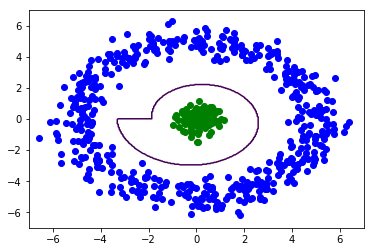

In [86]:
problem5(polarPer, training=trainPerceptron)

## Bonus: More than 2 dimensions

For this problem you'll need to build a perceptron with 784 input neurons, one output neuron and one bias. You will also have to build the training algorithm for this perceptron since it is impractical to try to sort through all 784 weights by hand.

The data set you'll be dealing with is actually a subset of the MNIST data set: only pictures (28px by 28px) of zeros and ones.

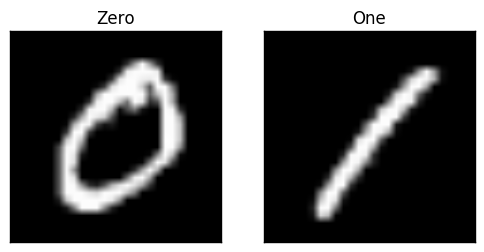

In [12]:
dataset = np.load('dataset_01.npy')
zero = dataset[0,:,:]
one  = dataset[6000,:,:]

plt.subplot(121)
plt.imshow(zero, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Zero')
plt.subplot(122)
plt.imshow(one, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('One');

To plot this into two dimensions principal component analysis will be used to reduce the dimensionality to two dimensions. The visuals are convenient, but the error rate is the real stat you should concentrate on.

In [13]:
def biggerPerceptron(X,w):
    """
    Here is where your code goes
    """
    return

In [14]:
def trainPerceptron(dataset, labels, perceptron):
    """
    dataset: a numpy array with shape (number of inputs, dimension of inputs)
    labels: a numpy array with shape (number of inputs, 1); the labels are either 0 or 1
    perceptron: your perceptron function; it must consume the input vector, and a vector of weights
    
    The function returns a numpy array with the weights. The last weight is the bias.
    """
    return weights

In [15]:
def problem5(perceptron=None):
    dataset = np.load('dataset_01.npy')/255
    labels = np.load('labels_01.npy')
    
    mean = np.mean(dataset, axis=0)
    std  = np.std(dataset, axis=0)
    whiteData = np.nan_to_num((dataset - mean)/std).reshape(12665 ,784)
    cov = whiteData.T @ whiteData
    U, _, _ = np.linalg.svd(cov)
    
    if perceptron!=None:
        weights = trainPerceptron(whiteData, labels, perceptron)

    x =  whiteData @ U[:,:2]
    plt.scatter(x[:5923,0], x[:5923,1], color='blue', s=2)
    plt.scatter(x[5923:,0], x[5923:,1], color='green', s=2)
    
    if perceptron!=None:        
        size = 500
        X,Y = np.meshgrid(np.linspace(-40,25,size),np.linspace(-40,50,size))
        x = np.stack([X,Y], axis=-1)
        Z = np.zeros([size,size])
        for i in range(size):
            for j in range(size):
                Z[i,j] = perceptron(U[:,:2] @ x[i,j,:], weights)
        plt.contour(X,Y,Z, [0])
    plt.xlim([-30,15])
    plt.ylim([-30,40])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


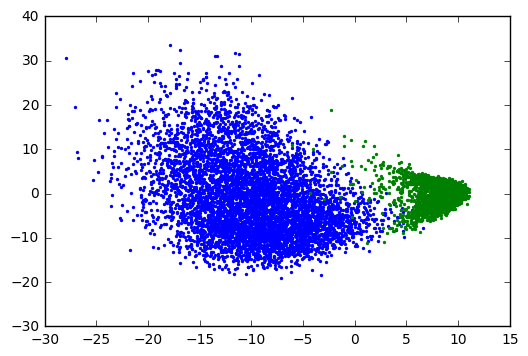

In [16]:
problem5(perceptron=None)